# K- Means Clustering
Using clustering algorithm on iris dataset


In [1]:
#importing all the basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
data_url="iris.csv"
dataframe=pd.read_csv(data_url)

In [3]:
#Looking at our dataset
print(dataframe.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Data Preprocessing

In [4]:
#getting only features from our dataset to work with clustering algorithm
X=dataframe.iloc[:,1:5].values
print(X.shape)

(150, 4)


###  Finding optimum number of clusters for K Means 
For this we calculate Within Cluster Sum of Square for different values of k then use The Elbow Method

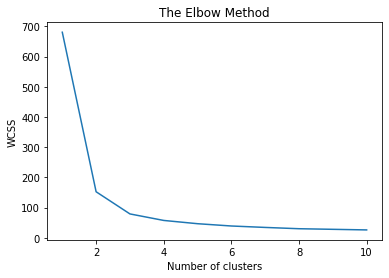

In [5]:
#finding the optimum number for K i.e the no of clusters 
from sklearn.cluster import KMeans

#empty array to store all Within-Cluster-Sum-of-Squares for different values of K
wcss=[]

#taking values for k upto 10
for i in range(1,11):
    kmeans=KMeans(n_clusters = i,init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot graph and use elbow method
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Making our model with optimum no of cluster i.e k value which is 3 as by looking at plot above it is clear that elbow occur at 3 where WCSS doesn't decrease significantly with every iteration.

In [6]:
#by looking at graph it is clear that 3 is most optimum value for no of clusters
kmeans=KMeans(n_clusters=3, init="k-means++",random_state=0)
y_kmeans=kmeans.fit_predict(X)
#Lets see how our data got classified based on clusters formed
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


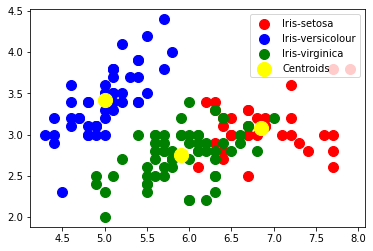

In [7]:
#plotting all the points on graph by taking first two features and plotting them on x-y axis
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="Iris-setosa")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c="blue",label="Iris-versicolour")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="green",label="Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c="yellow",label = 'Centroids')
plt.legend(loc='upper right')